In [1]:
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt
import math
import time
import networkx as nx
import random
from tqdm import tqdm
from typing import List, Tuple
import numpy as np
import seaborn as sns
data=pd.read_csv('/srv/abacus-1/uniswapv2_TY_23/UniswapV2_daily_snapshot_sync_18012051_with_price.csv')
if data['price'].dtype != float:
    data['price'] = data['price'].astype(float)

/home/user/qshang/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.2' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/user/qshang/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (


No Bottleneck unit testing available.


/tmp/ipykernel_2494177/321123278.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/home/user/qshang/.local/lib/python3.9/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/tmp/ipykernel_2494177/321123278.py:12: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.


In [133]:
sample_data = data[data['reserveUSD'] > 100000]
sample_data

block_number            timestamp  \
39          18007091  2023-08-27T16:08:23   
363         18008030  2023-08-27T19:17:59   
378         18011761  2023-08-28T07:49:59   
1293        11388958  2020-12-04T22:52:58   
1733        18012022  2023-08-28T08:42:23   
...              ...                  ...   
233383      17743092  2023-07-21T17:45:47   
233433      18008208  2023-08-27T19:53:35   
233517      18008593  2023-08-27T21:11:11   
233729      18008590  2023-08-27T21:10:35   
233835      18010960  2023-08-28T05:09:11   

                                                  tx_hash  log_index  \
39      0xe2390b1681a180795474cd75c93ce38f7cbb4f39949f...        185   
363     0xacfb8ebedf47d0864a79ad240d0542702c7fb87b7dbb...        127   
378     0xda0423c7700a7aeeb790868c85604fe87376d1e412b8...        175   
1293    0xffa55203e9b7f3929c8b46d2ca72874ea02979e4e39e...        145   
1733    0xf88b5be03b8001c7a98637e089b24fb98ada54eb5f36...        345   
...                                                   ...        ...   
233383  0xe45a1a001e4e71258ac342f77f6be64f424a4ebc2935...        276   
233433  0xa2e8107ca75078c77aec8631371630238753f1e4ac1d...        172   
233517  0x15d0c2a9c44e8fde755c64ac47eddc7fe7e53741444a...        138   
233729  0x18922d96f3d86b7169489aac1efb2369172d03652bd3...        214   
233835  0x682eac81db01afb81b65abe4f6496e94983203a50642...         64   

        transactionIndex                      token_contract_address  \
39                    78  0x000dd0b1528a396c6ea2e09796a7b4a534e9e37b   
363                   16  0x006ab11e89e7246cb8c0f7bdaa8c2713374b1676   
378                   33  0x006fa24d5122bfc8f5e5913d9949a95e433591b6   
1293                 100  0x0179d00549b44d3161b9c260815f8a5947a541b3   
1733                  46  0x01f4916850f37d262108a31aa7e1367441eba344   
...                  ...                                         ...   
233383               108  0xff496e9135ee1bac7b87f92b48ec147bbe4a0584   
233433               114  0xff578ac8ef9df9d02368842b7b0810a14e770d71   
233517                44  0xff734dcb7fd6517caed5c6c8720992a0c676c800   
233729                72  0xffa98a091331df4600f87c9164cd27e8a5cd2405   
233835                21  0xffc8305f88ca38901bf1407567a5d0e17a9c680e   

                                reserve0                     reserve1  \
39                  25250199262910743554   99030013737877065188665188   
363     98593787293694721822921779604561         39929608351407164681   
378      1573217687903395435294483347857        101120681200849468631   
1293           1000000000000000000000000      10000000000000000000000   
1733                  120996716385084921         33617776813411164361   
...                                  ...                          ...   
233383        12654584581127387385903228         60208928300328846609   
233433   2272937370706194134014682289733        116673818317341156741   
233517           21183268020268461088011        128966135740069148649   
233729         3068050332835910790218674        473035715547761695708   
233835              17777812860736479717  156709496441800047332245778   

                            pair_contract_address1  createdAtBlockNumber  ...  \
39      0x000dd0b1528a396c6ea2e09796a7b4a534e9e37b            12408218.0  ...   
363     0x006ab11e89e7246cb8c0f7bdaa8c2713374b1676            15908686.0  ...   
378     0x006fa24d5122bfc8f5e5913d9949a95e433591b6            17296468.0  ...   
1293    0x0179d00549b44d3161b9c260815f8a5947a541b3            11388958.0  ...   
1733    0x01f4916850f37d262108a31aa7e1367441eba344            17048247.0  ...   
...                                            ...                   ...  ...   
233383  0xff496e9135ee1bac7b87f92b48ec147bbe4a0584            10774311.0  ...   
233433  0xff578ac8ef9df9d02368842b7b0810a14e770d71            15723470.0  ...   
233517  0xff734dcb7fd6517caed5c6c8720992a0c676c800            12200061.0  ...   
233729  0xffa98a091331df4600f87c9164cd27e8a5cd2405

In [94]:
# Update the network creation function to ensure reserve data is in float type
def create_network_with_float_constraints(data):
    G = nx.DiGraph()
    for _, row in data.iterrows():
        # Convert reserves to float
        reserve0 = float(row['reserve0'])
        reserve1 = float(row['reserve1'])

        # Add vertices (tokens)
        G.add_node(row['token0.id'])
        G.add_node(row['token1.id'])

        # Add an edge from token0 to token1 with price and additional attributes
        forward_edge_attributes = {
            'price': row['price'],
            'reserve': reserve1,  # reserve of token1 for token0 to token1 edge
            'block_number': row['block_number'],
            'transactionIndex': row['transactionIndex'],
            'log_index': row['log_index']
        } 
        G.add_edge(row['token0.id'], row['token1.id'], **forward_edge_attributes)

        # Add the reverse edge from token1 to token0 with the inverse price
        reverse_edge_attributes = {
            'price': 1 / row['price'] if row['price'] != 0 else 0,
            'reserve': reserve0, 
            'block_number': row['block_number'],
            'transactionIndex': row['transactionIndex'],
            'log_index': row['log_index']
        }
        G.add_edge(row['token1.id'], row['token0.id'], **reverse_edge_attributes)

    return G

In [95]:
G_sample = create_network_with_float_constraints(sample_data)

In [34]:
def find_cycles_classified_by_length(G: nx.DiGraph, start_node: str, max_depth=10) -> dict:
    """
    Find all true cycles starting and ending with the given node in a directed graph,
    and classify them by their length.

    :param G: Directed graph
    :param start_node: Node to start and end cycles
    :param max_depth: Maximum depth to search to prevent deep recursion
    :return: Dictionary with keys as cycle lengths and values as lists of cycles of that length
    """
    cycles_by_length = {}

    def dfs(current_node, visited, path, depth):
        """
        Depth-first search to find and classify cycles by length.

        :param current_node: Current node being visited
        :param visited: Set of visited nodes in the current path
        :param path: Current path of nodes
        :param depth: Current depth of recursion
        """
        if depth > max_depth:
            # Max depth reached, return to prevent infinite recursion
            return

        # Add current node to visited set and path
        visited.add(current_node)
        path.append(current_node)

        for neighbor in G.successors(current_node):
            if neighbor == start_node and len(set(path)) > 2:  # Ensure true cycle with more than one edge
                cycle = tuple(path + [start_node])
                cycle_length = len(cycle)
                # Add cycle to the corresponding list by its length
                if cycle_length not in cycles_by_length:
                    cycles_by_length[cycle_length] = []
                cycles_by_length[cycle_length].append(cycle)
            elif neighbor not in visited:
                dfs(neighbor, visited.copy(), path.copy(), depth + 1)

    # Start DFS from the start node
    dfs(start_node, set(), [], 1)

    return cycles_by_length

# Note: This adapted function is designed for demonstration purposes.
# Please adjust the `max_depth` parameter based on your graph's size and complexity to avoid excessive recursion.

In [35]:
def calculate_slippage_and_check_reserve(price, amount, reserve):
    """
    Calculate the slippage and check if the amount is within the liquidity reserve.
    :param price: The price of the token.
    :param amount: The amount to be traded.
    :param reserve: The liquidity reserve.
    :return: The adjusted price considering slippage and a boolean indicating if the reserve is sufficient.
    """
    # Assuming a slippage model where slippage increases with the square of the amount (to a power of 2)
    # This is a simple model and may not accurately represent all liquidity pool mechanisms.
    slippage = (amount / reserve)**2
    adjusted_price = price * (1 + slippage)
    reserve_sufficient = amount <= reserve
    return adjusted_price, reserve_sufficient

def calculate_arbitrage_amount(G, path, start_amount=1.0):
    """
    Calculate the arbitrage amount for a given path considering slippage and reserve checks.
    
    :param G: Directed graph from which to extract path details.
    :param path: The path for which to calculate the arbitrage amount.
    :return: Arbitrage amount considering slippage, or None if any reserve is insufficient.
    """
    amount = start_amount  # Start with 1 unit of the starting token
    for i in range(len(path) - 1):
        start_node = path[i]
        end_node = path[i + 1]
        edge_data = G.get_edge_data(start_node, end_node)
        price = edge_data['price']
        reserve = edge_data['reserve']
        
        # Calculate adjusted price with slippage and check reserve
        adjusted_price, reserve_sufficient = calculate_slippage_and_check_reserve(price, amount, reserve)
        
        if not reserve_sufficient:
            return None  # If reserve is not sufficient for any trade, return None to indicate failure
        
        amount *= adjusted_price  # Convert the amount through each adjusted price
    
    return amount - start_amount  # Subtract the initial 1 unit to get the arbitrage amount


def extract_path_details(G, paths):
    """
    Extract details for given paths from the graph G and calculate arbitrage amount for each path.

    :param G: Directed graph from which to extract path details and calculate arbitrage.
    :param paths: List of paths (each path is a tuple of node IDs).
    :return: List of dictionaries with path details including arbitrage amount.
    """
    path_details_list = []  # List to store details of all paths including arbitrage amount

    for path in paths:
        path_details = {
            'path': path,
            'arbitrage_amount': calculate_arbitrage_amount(G, path),
            'details': {
                'block_number': [],
                'transactionIndex': [],
                'log_index': []
            }
        }
        
        # Extract details for each edge in the path
        for i in range(len(path) - 1):
            start_node = path[i]
            end_node = path[i + 1]
            edge_data = G.get_edge_data(start_node, end_node)
            
            path_details['details']['block_number'].append(edge_data['block_number'])
            path_details['details']['transactionIndex'].append(edge_data['transactionIndex'])
            path_details['details']['log_index'].append(edge_data['log_index'])
        
        path_details_list.append(path_details)

    return path_details_list
def calculate_equivalent_start_token_reserve(G, path):
    """
    Calculate the equivalent reserve of the start token along a given path, considering
    the reserve and price of each token in the path.

    :param G: Directed graph containing the tokens and their exchange data.
    :param path: The path of token exchanges.
    :return: The equivalent reserve of the start token considering the entire path.
    """
    # Start with an empty list to keep track of the equivalent reserves
    equivalent_reserves = []
    
    # Iterate through each edge in the path to calculate the equivalent reserve
    for i in range(len(path) - 1):
        start_node = path[i]
        end_node = path[i + 1]
        
        # Get the exchange data for the current edge
        edge_data = G.get_edge_data(start_node, end_node)
        price = edge_data['price']  # Price to exchange start_node token for end_node token
        reserve = edge_data['reserve']  # Reserve of the end_node token
        
        # Calculate the equivalent reserve of the start token for this exchange
        # Assuming the price is defined as the amount of end_node token you get for one start_node token
        equivalent_reserve = reserve / price
        equivalent_reserves.append(equivalent_reserve)
    
    # The equivalent start token reserve is the minimum of all equivalent reserves
    # since the path's bottleneck determines the maximum amount that can be exchanged
    equivalent_start_token_reserve = min(equivalent_reserves) if equivalent_reserves else 0
    
    return equivalent_start_token_reserve
def process_cycles_with_slippage_and_reserve(G, cycles_by_length, length=None):
    """
    Process cycles to calculate arbitrage amounts considering slippage and equivalent start token reserve,
    optionally filtered by a specific cycle length.

    :param G: Directed graph containing token exchange data.
    :param cycles_by_length: Dictionary of cycles classified by their length.
    :param length: Specific length of cycles to process. If None, processes all lengths.
    :return: A dictionary with updated cycle details including arbitrage amounts and equivalent reserves.
    """
    processed_details = {}
    
    if length is not None and length in cycles_by_length:
        relevant_cycles = {length: cycles_by_length[length]}
    else:
        relevant_cycles = cycles_by_length

    for cycle_length, cycles in relevant_cycles.items():
        details_list = []
        for path in cycles:
            equivalent_reserve = calculate_equivalent_start_token_reserve(G, path)
            min_amount_for_arbitrage = min(1.0, equivalent_reserve)
            arbitrage_amount = calculate_arbitrage_amount(G, path, min_amount_for_arbitrage)
            
            if arbitrage_amount is not None and arbitrage_amount > 0:
                cycle_detail = {
                    'path': path,
                    'equivalent_start_token_reserve': equivalent_reserve,
                    'arbitrage_amount': arbitrage_amount,
                    'details': extract_path_details(G, [path])[0]['details']
                }
                details_list.append(cycle_detail)

        processed_details[cycle_length] = details_list

    return processed_details

In [97]:
start_token = '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2'
cycles_by_length = find_cycles_classified_by_length(G_sample, start_token, max_depth=7)
processed_cycles = process_cycles_with_slippage_and_reserve(G_sample, cycles_by_length, length=7)

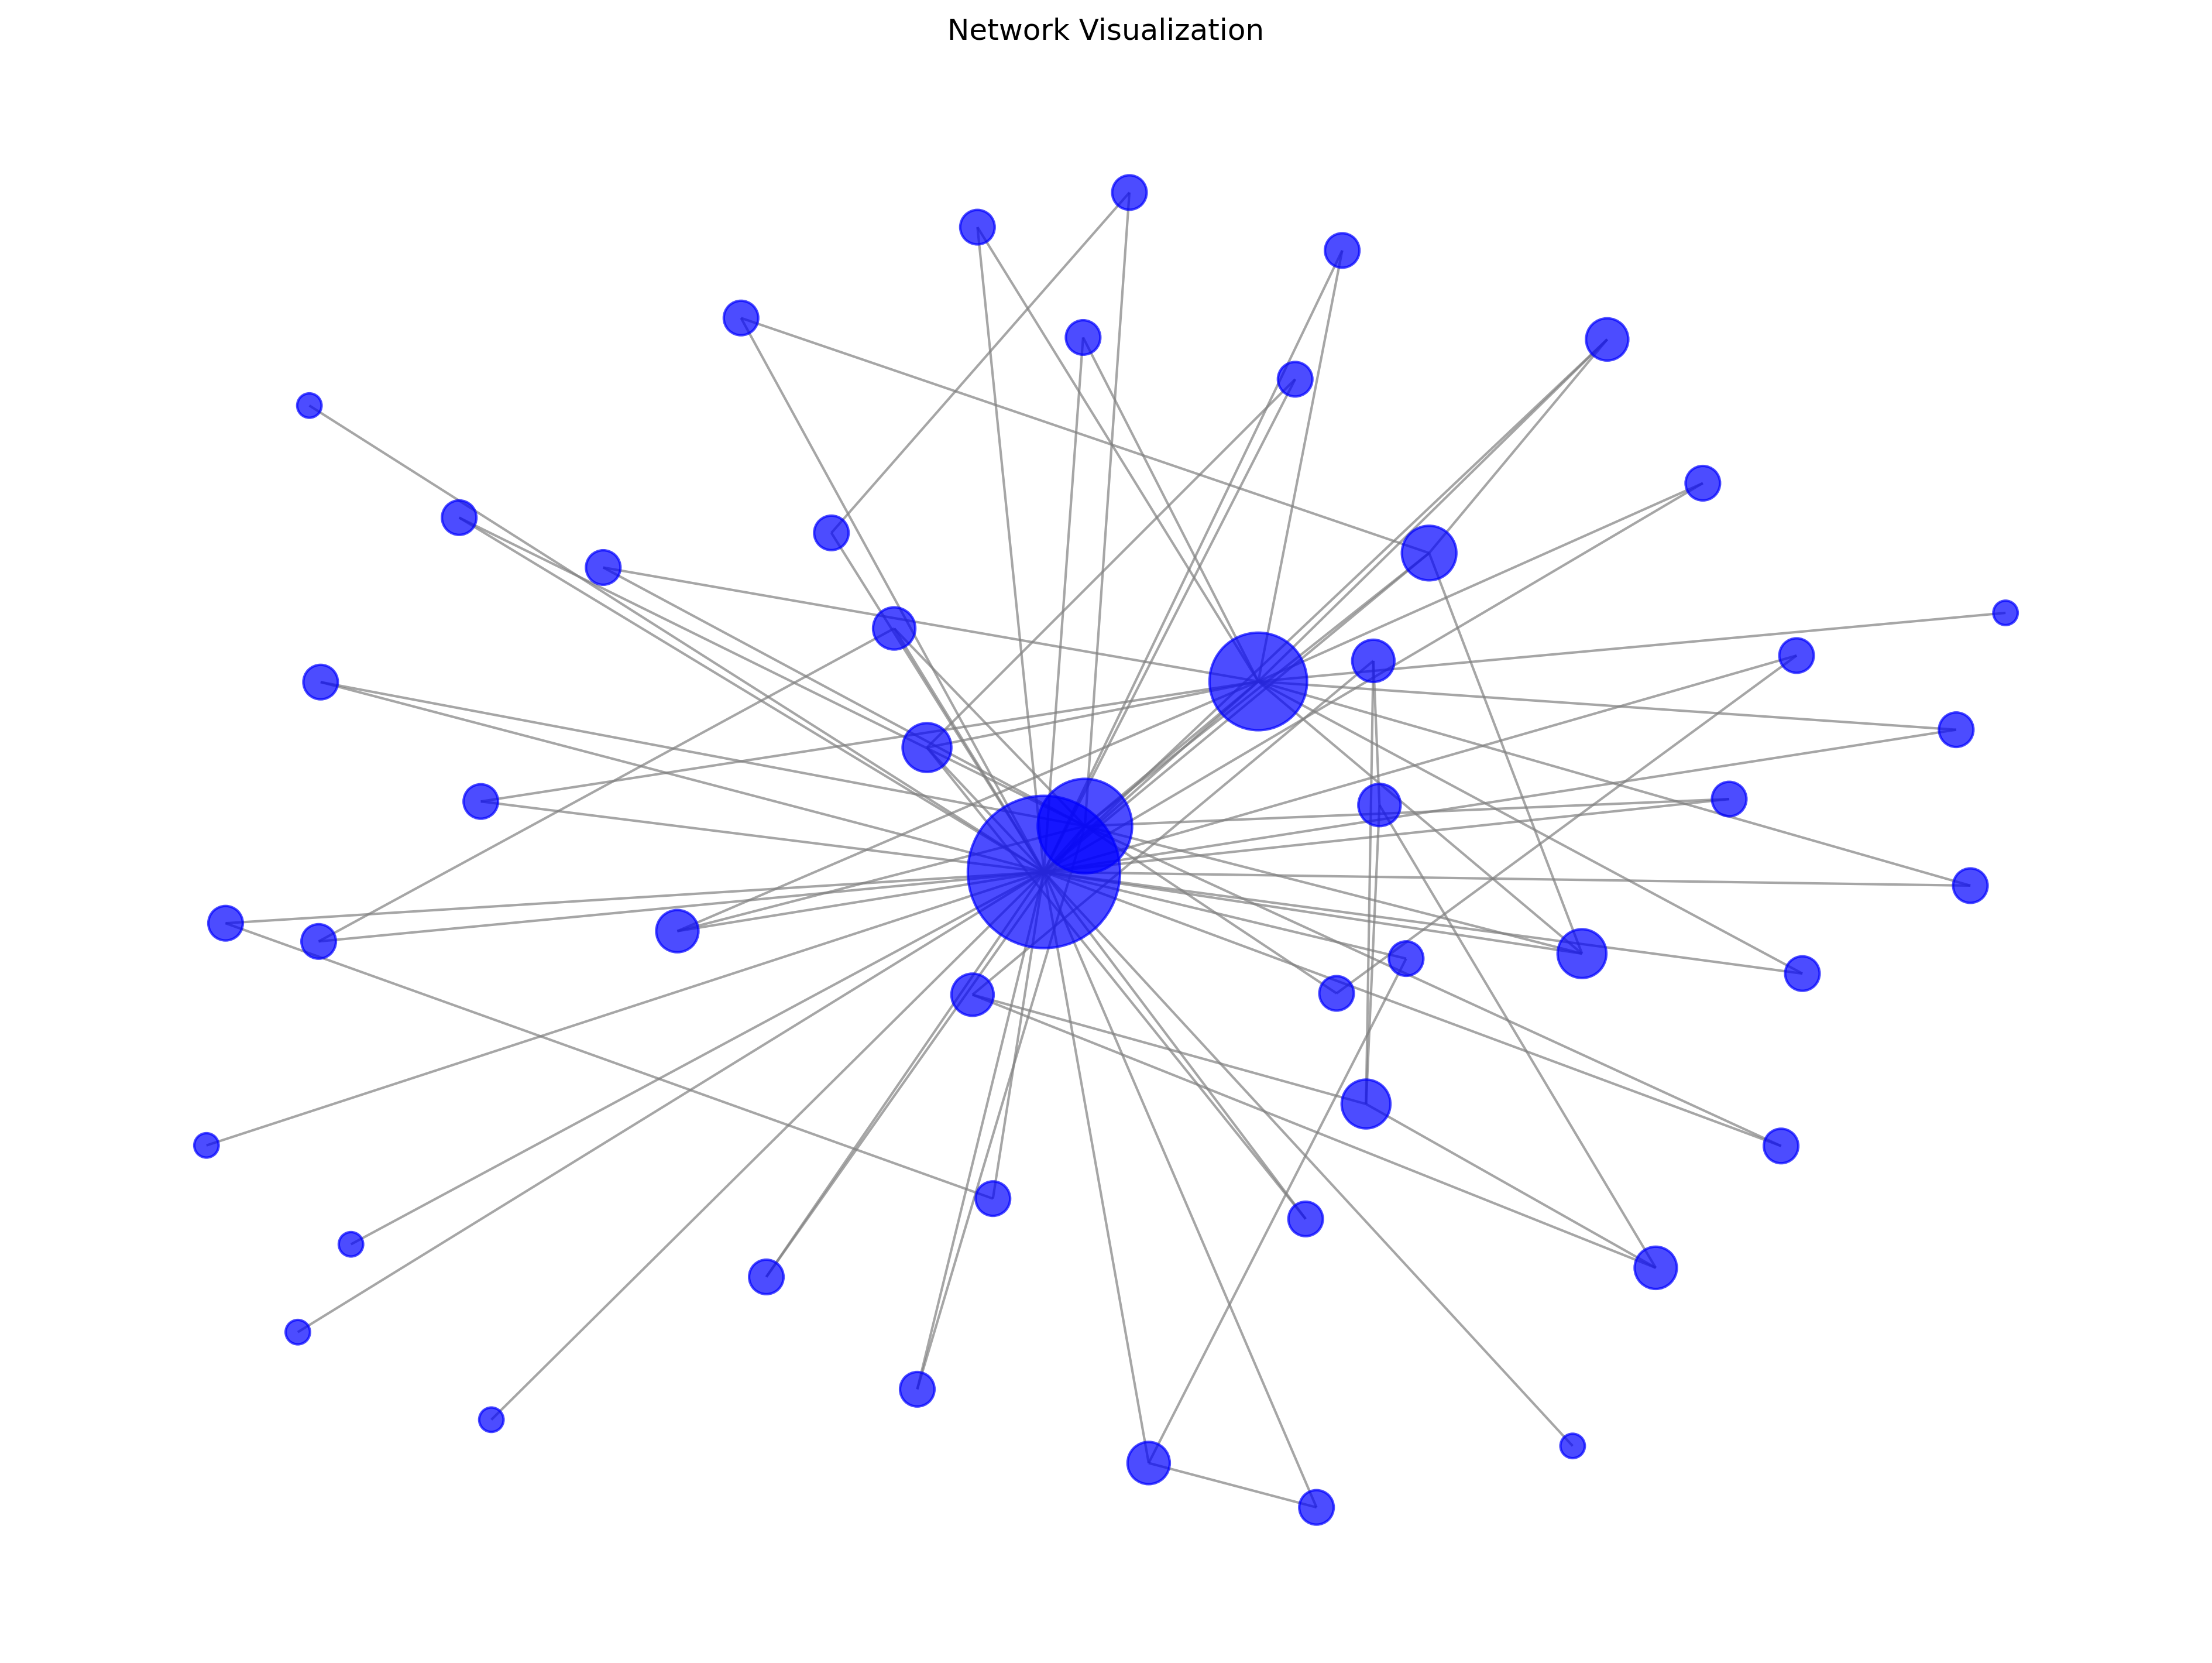

In [134]:
# Update the network creation function to ensure reserve data is in float type and create the network
def create_network_with_float_constraints(data):
    G = nx.Graph()  # Using an undirected graph for visualization purposes
    for _, row in data.iterrows():
        G.add_node(row['token0.id'])
        G.add_node(row['token1.id'])
        G.add_edge(row['token0.id'], row['token1.id'])

    return G

G_sample = create_network_with_float_constraints(sample_data)

# Remove nodes with degree of 1
nodes_with_degree_one = [node for node, degree in dict(G_sample.degree()).items() if degree == 1]
G_sample.remove_nodes_from(nodes_with_degree_one)

# Prepare to adjust node size based on degree
node_degree = dict(G_sample.degree())
node_size = [v * 100 for v in node_degree.values()]  # Scale node size for visualization

# Use a force-directed layout to improve the visualization and reduce overlaps
pos = nx.spring_layout(G_sample, k=0.5, iterations=20)
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(16,12),dpi =300)
#plt.figure(figsize=(14, 10))
nx.draw(G_sample, pos, node_size=node_size, with_labels=False, edge_color="gray", node_color="blue", alpha=0.7)
plt.title("Network Visualization")
plt.show()
#fig.savefig('Visual1.pdf',dpi=300,bbox_inches='tight',facecolor='w')

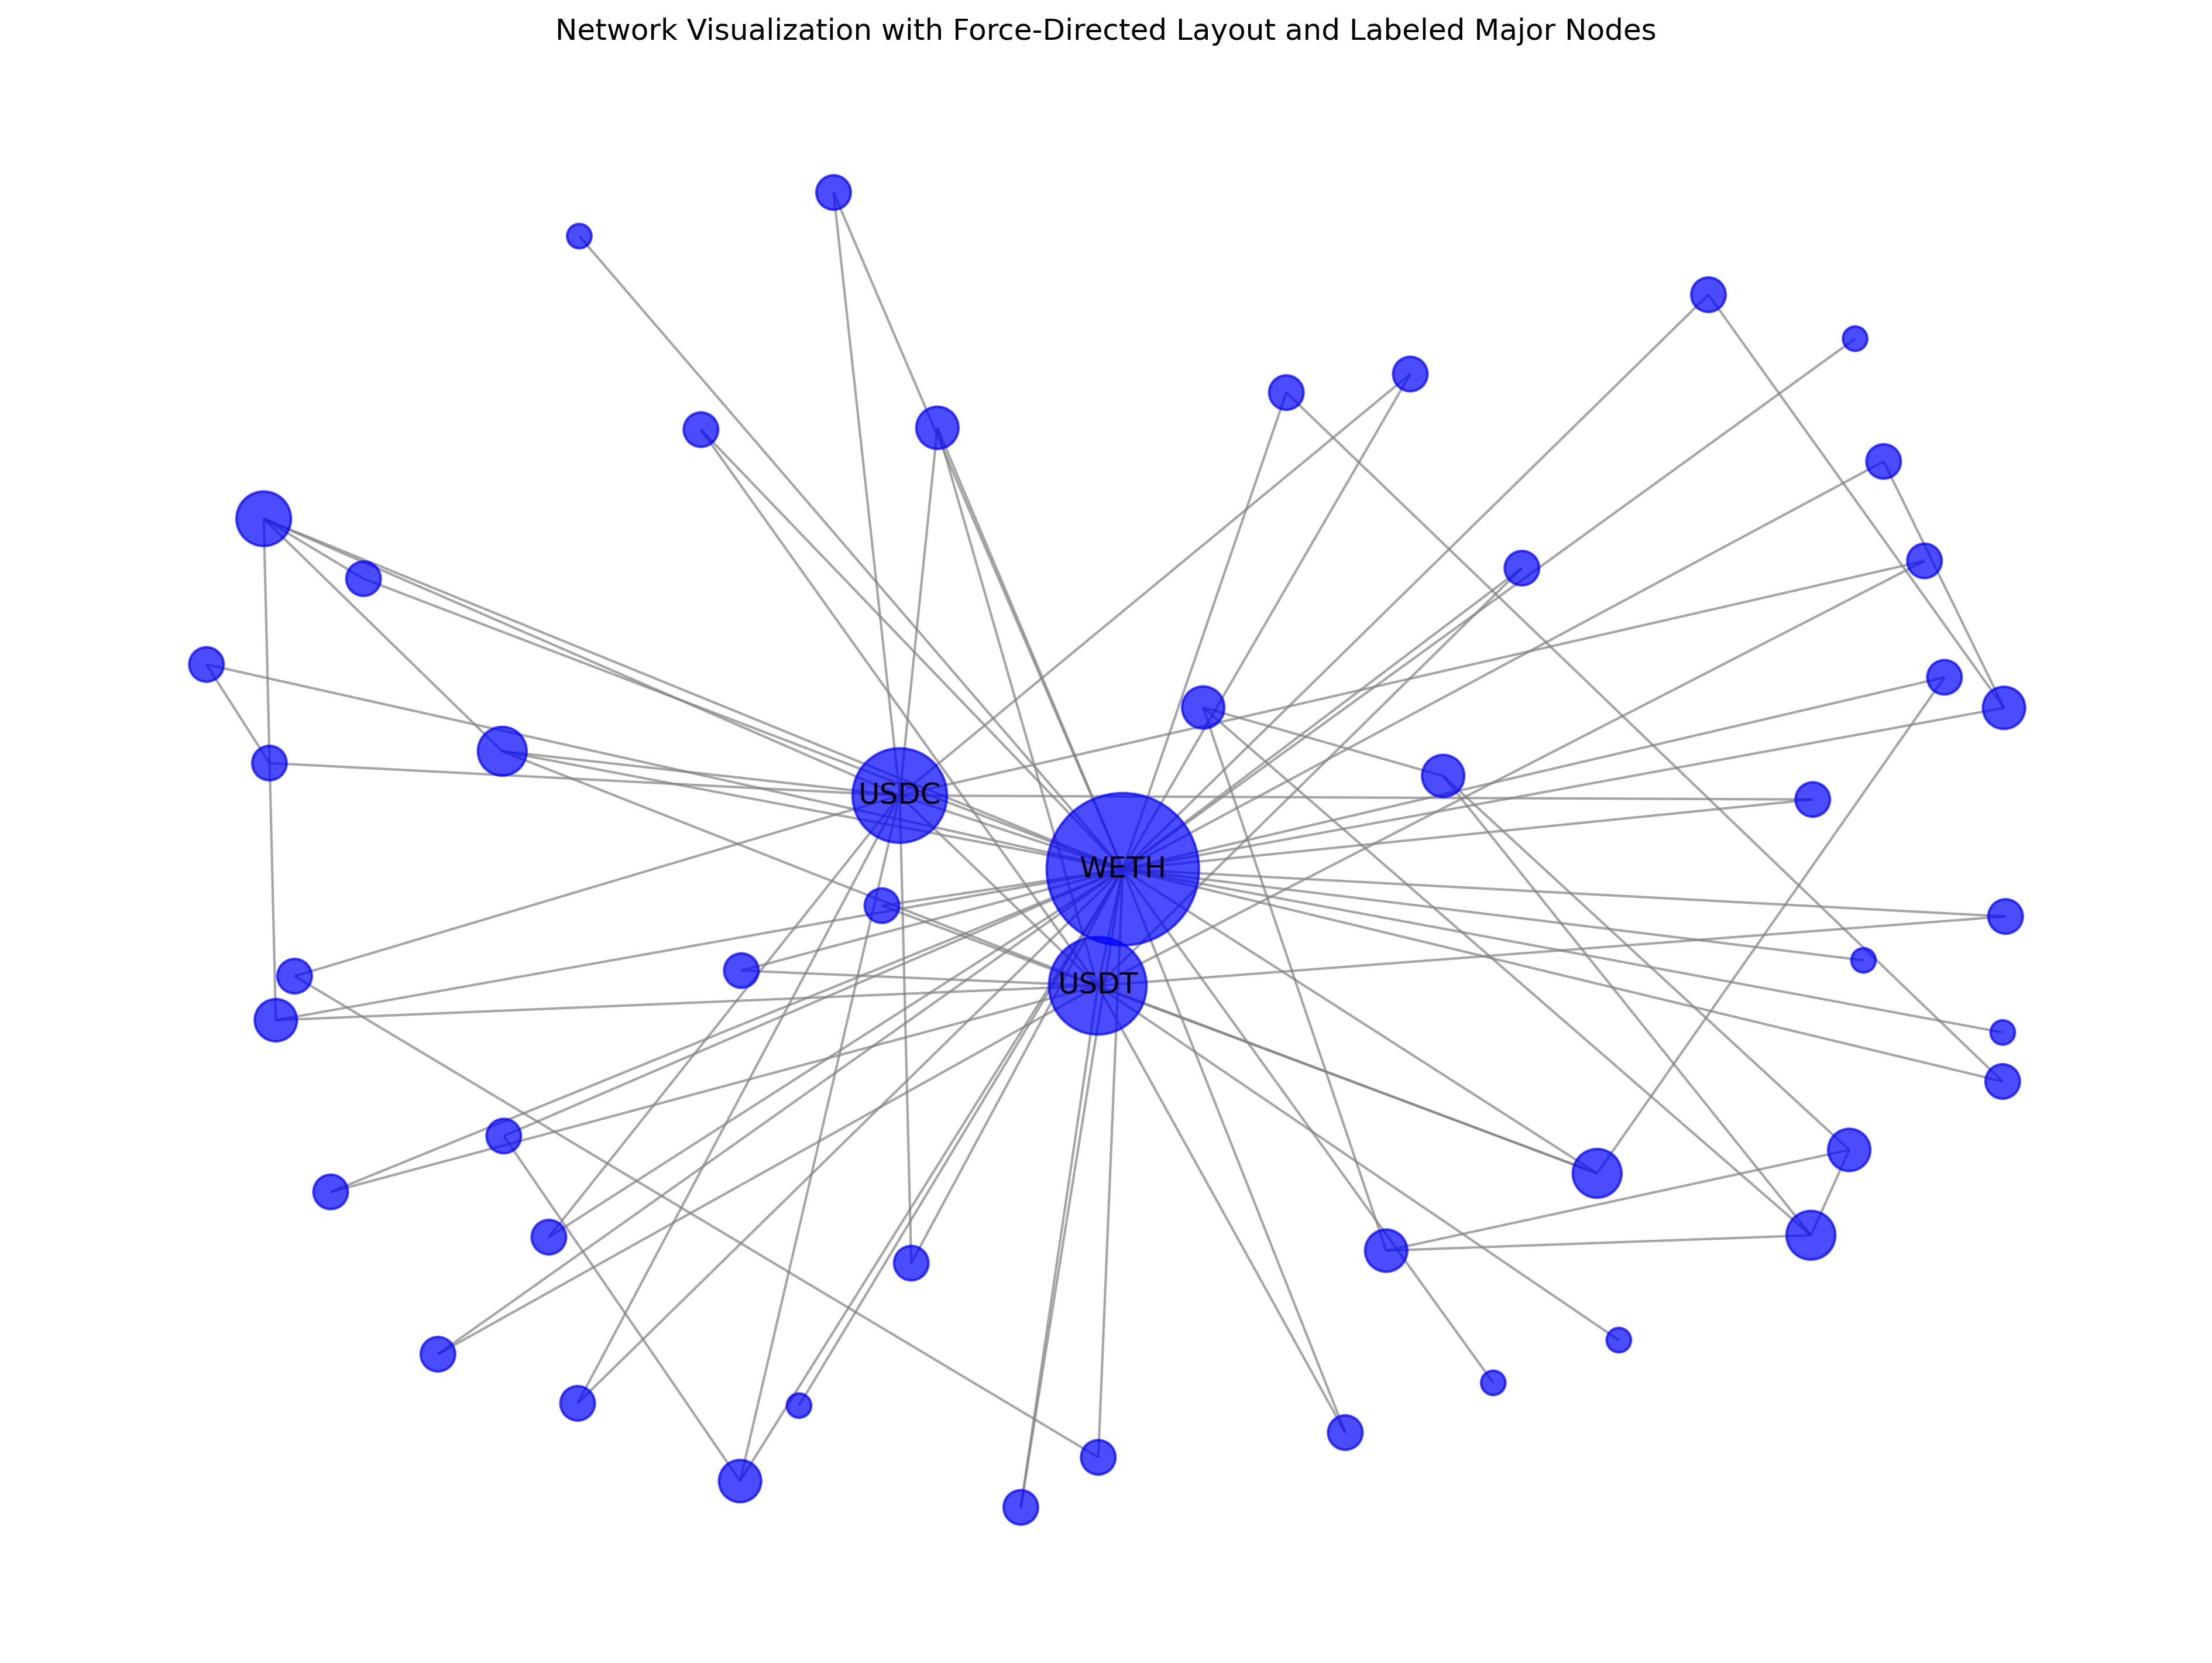

In [139]:
# Re-calculate the force-directed layout for the original visualization
pos_original = nx.spring_layout(G_sample, k=0.6, iterations=20)

# Define labels for the three largest connected nodes
largest_nodes_labels = {
    '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2': 'WETH',
    '0xdac17f958d2ee523a2206206994597c13d831ec7': 'USDT',
    '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48': 'USDC'
}

# Draw the network using the force-directed layout
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(16,12),dpi =300)
nx.draw(G_sample, pos_original, node_size=node_size, with_labels=False, edge_color="gray", node_color="blue", alpha=0.7)

# Add labels for the three specified nodes
nx.draw_networkx_labels(G_sample, pos_original, labels=largest_nodes_labels, font_color='black')

plt.title("Network Visualization with Force-Directed Layout and Labeled Major Nodes")
plt.show()
fig.savefig('Visual1.pdf',dpi=300,bbox_inches='tight',facecolor='w')

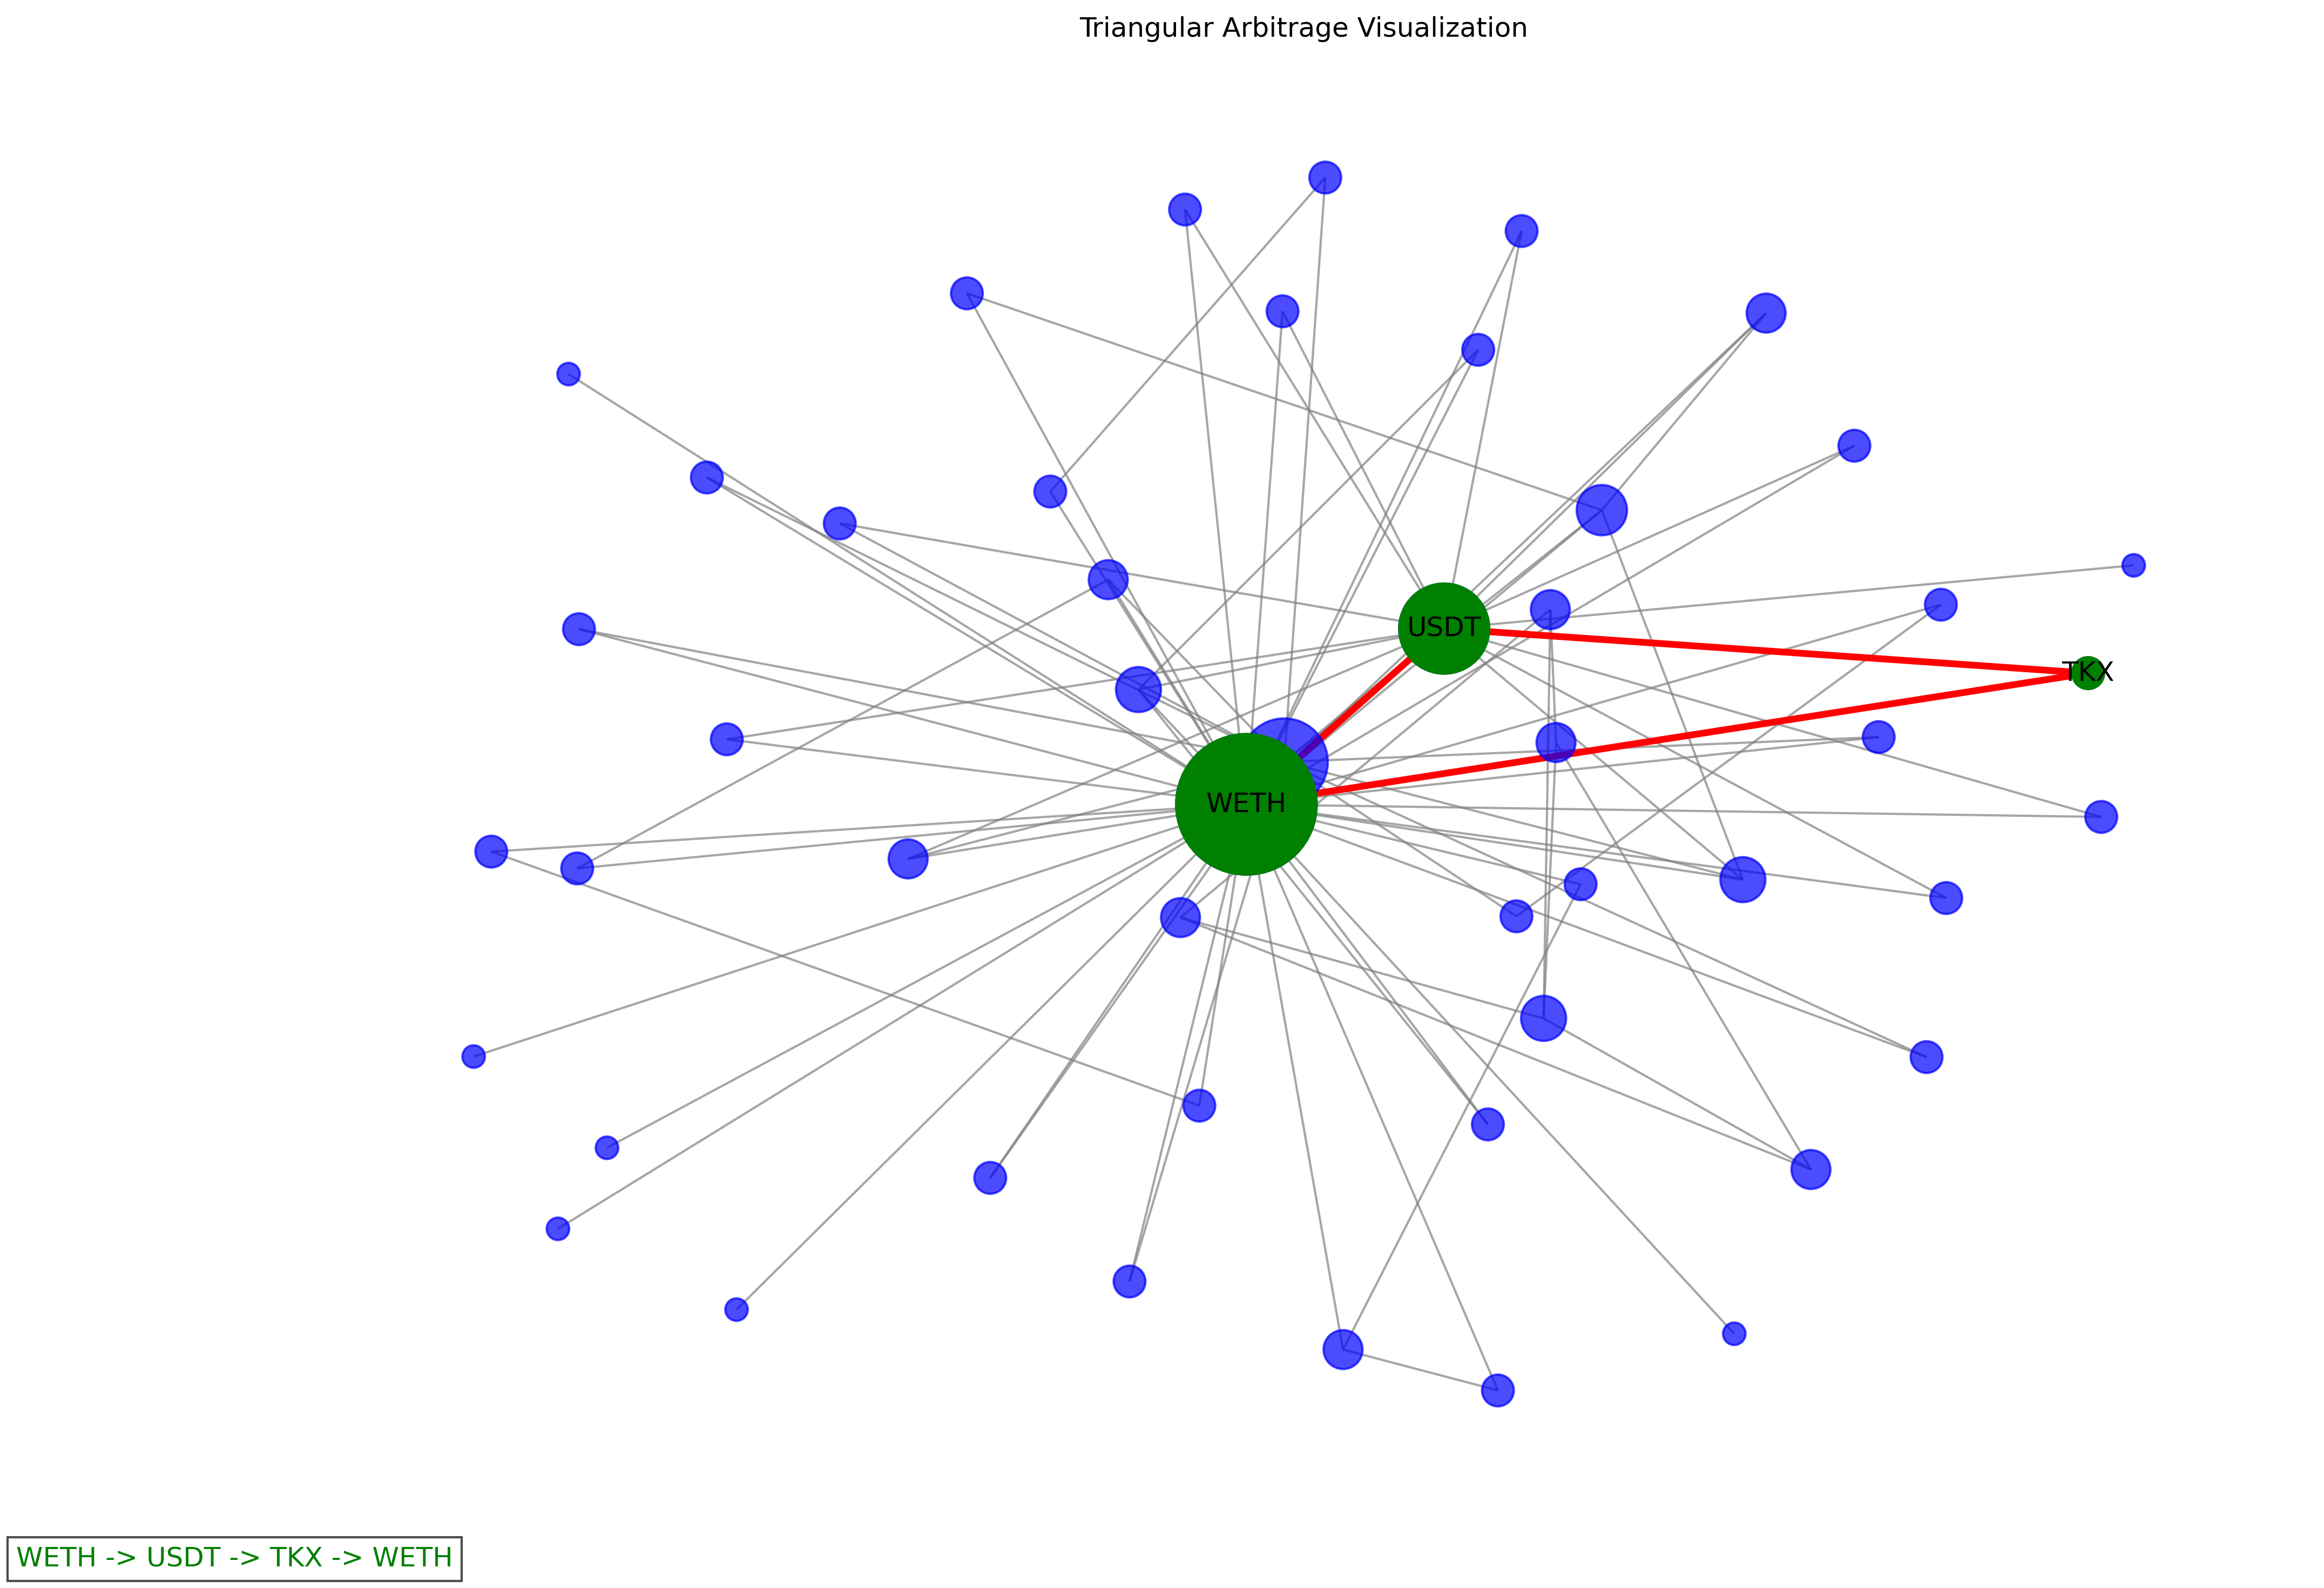

In [138]:
# Define the loop and labels for visualization
loop_nodes = [
    '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2',
    '0xdac17f958d2ee523a2206206994597c13d831ec7',
    '0x667102bd3413bfeaa3dffb48fa8288819e480a88',
    '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2'
]
labels = {
    '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2': 'WETH',
    '0xdac17f958d2ee523a2206206994597c13d831ec7': 'USDT',
    '0x667102bd3413bfeaa3dffb48fa8288819e480a88': 'TKX'
}

# Extract positions for the specified loop nodes
loop_positions = {node: pos[node] for node in loop_nodes}

# Correcting the node_size calculation for highlighted nodes
highlighted_node_size = [node_size[list(G_sample.nodes()).index(n)] for n in loop_nodes[:-1]]

# Redraw the entire network and add arrows to highlight the loop with direction
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(16,12),dpi =300)
plt.figtext(0.1, 0.1, "WETH -> USDT -> TKX -> WETH", ha="center", fontsize=12, color='green', bbox=dict(facecolor='white', alpha=0.7))
nx.draw(G_sample, pos, node_size=node_size, with_labels=False, edge_color="gray", node_color="blue", alpha=0.7)

# Highlight the loop with arrows indicating direction
nx.draw_networkx_nodes(G_sample, pos, nodelist=loop_nodes[:-1], node_color="green", node_size=highlighted_node_size)
nx.draw_networkx_edges(G_sample, pos, edgelist=[(loop_nodes[i], loop_nodes[i+1]) for i in range(len(loop_nodes)-1)], edge_color="red", width=3, arrows=True, arrowsize=10000)
nx.draw_networkx_labels(G_sample, loop_positions, labels, font_color='black')

plt.title("Triangular Arbitrage Visualization")
plt.show()
#fig.savefig('Visual2.pdf',dpi=300,bbox_inches='tight',facecolor='w')

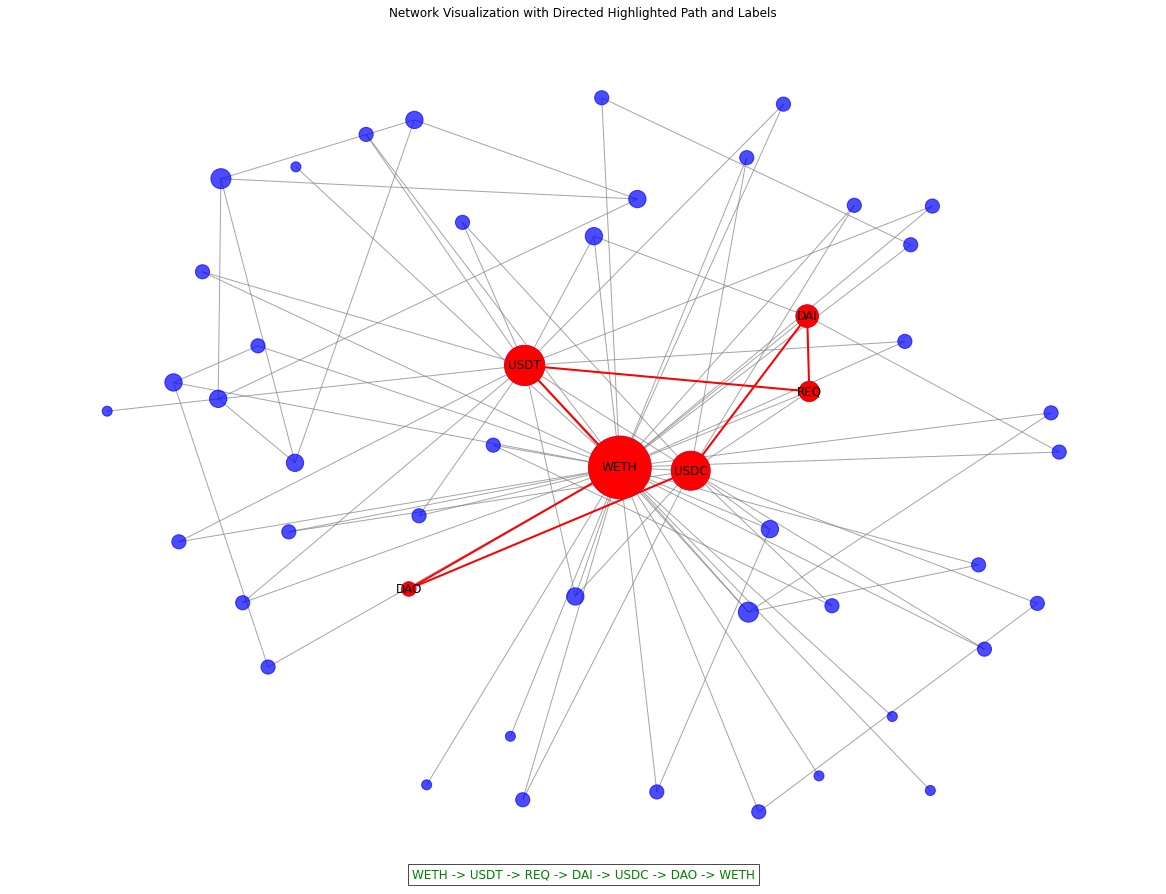

In [102]:
# Define the new path and labels for visualization
new_path_nodes = [
    '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2',
    '0xdac17f958d2ee523a2206206994597c13d831ec7',
    '0x8f8221afbb33998d8584a2b05749ba73c37a938a',
    '0x6b175474e89094c44da98b954eedeac495271d0f',
    '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48',
    '0x0f51bb10119727a7e5ea3538074fb341f56b09ad',
    '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2'
]
new_labels = {
    '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2': 'WETH',
    '0xdac17f958d2ee523a2206206994597c13d831ec7': 'USDT',
    '0x8f8221afbb33998d8584a2b05749ba73c37a938a': 'REQ',
    '0x6b175474e89094c44da98b954eedeac495271d0f': 'DAI',
    '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48': 'USDC',
    '0x0f51bb10119727a7e5ea3538074fb341f56b09ad': 'DAO'
}

# Extract positions for the specified path nodes
new_path_positions = {node: pos[node] for node in new_path_nodes}

# Draw the entire network
plt.figure(figsize=(16, 12))
nx.draw(G_sample, pos, node_size=node_size, with_labels=False, edge_color="gray", node_color="blue", alpha=0.7)

# Highlight the new path in red with arrows
nx.draw_networkx_nodes(G_sample, pos, nodelist=new_path_nodes[:-1], node_color="red", node_size=[node_size[list(G_sample.nodes()).index(n)] for n in new_path_nodes[:-1]])
nx.draw_networkx_edges(G_sample, pos, edgelist=[(new_path_nodes[i], new_path_nodes[i+1]) for i in range(len(new_path_nodes)-1)], edge_color="red", width=2, arrows=True, arrowsize=20)
nx.draw_networkx_labels(G_sample, new_path_positions, new_labels, font_color='black')

# Center the annotation for the new path explanation
plt.figtext(0.5, 0.01, "WETH -> USDT -> REQ -> DAI -> USDC -> DAO -> WETH", ha="center", fontsize=12, color='green', bbox=dict(facecolor='white', alpha=0.7))

plt.title("Network Visualization with Directed Highlighted Path and Labels")
plt.show()